# Basic Data Analytics with Pandas

**Description**

This script will cover the most essential and useful techniques for data analytics in sovling a real-world problem with key Python data analysis libraries: pandas and numpy. 

The Script will go through data loading, and operations on data frame: creation, selection and query, grouping and function applying, plotting and write data to file.

**1. Start with importing essentials**

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**2. Read data from a CSV file using the read_csv function in pandas.**

By default, it assumes that the fields are comma-separated.

In [2]:
df = pd.read_csv("1_Dataset.csv")

**3. Preview the first 10 rows with head().**

If not specified, it will preview first `5` rows. There is a similar function `df.tail()`, which will show you the last rows of a dataframe.

In [3]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**4. Print the number of rows and columns in the data?**

In [4]:
df.shape

(30471, 292)

In [5]:
print("Row number: {}\nColumn number: {}".format(df.shape[0], df.shape[1]))

Row number: 30471
Column number: 292


**5. Print fetures (columns names).**

In [6]:
df.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

Note that `df.columns` returns a `pandas.core.indexes.base.Index`, whereas `df.columns,values` returns an `numpy.ndarray`

In [7]:
type(df.columns), type(df.columns.values)

(pandas.core.indexes.base.Index, numpy.ndarray)

**6. Print the data type of each column?**

In [8]:
df.dtypes

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object

Note that `df.dtypes` returns `pandas.core.series.Series`.

In [9]:
type(df.dtypes)

pandas.core.series.Series

**7. Put all the numerical variable in list, exluding `id`.**

The data type of numerical variables should be int or float. Remenber to remove the 'id'.

Here is an example to show how to access data_type and feature name individually

In [10]:
numerical_feacture = []
cols = df.columns
data_type = df.dtypes
for i in range(len(cols)):
    if cols[i]=='id':
        continue
    if data_type[i] == 'int64' or data_type[i] == 'float64':
        numerical_feacture.append(cols[i])
print("There are totally {} numerical variables excluding 'id'".format(len(numerical_feacture)))
numerical_feacture

There are totally 275 numerical variables excluding 'id'


['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'raion_build_count_with_mater

This is also an example that shows how to access the element in padas.Series

**8. Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data.**

Method 1: access by specifying row number and column names

In [11]:
df[:5][['id', 'price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


Method 2: access by using df.loc

In [12]:
df.loc[:4, ['id', 'price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


Method 3: access by using df.iloc, notet that the indice should be integer, not string (column names)

In [13]:
df.iloc[:5, [0,-1]]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


**9. Select the rows with the Full area  larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.**


Method 1: use boolean indexing

In [14]:
df[(df.full_sq > 10) & (df.full_sq < 1500)].head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


Method 2: use query

In [15]:
df.query('full_sq > 10 and full_sq < 1500').head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


**10. Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.**

In [16]:
df.index

RangeIndex(start=0, stop=30471, step=1)

In [17]:
false_sq = df.index[df.full_sq < df.life_sq]
print("There are {} rows with full area smaller than living area.".format(len(false_sq)))
false_sq

There are 37 rows with full area smaller than living area.


Int64Index([ 1084,  1188,  1822,  1863,  2009,  4385,  6336,  6531,  6993,
             7208,  8101,  9237,  9256,  9482,  9646, 11332, 11711, 11784,
            12569, 13546, 13629, 13797, 14799, 16067, 16116, 16284, 20672,
            21080, 22412, 22611, 22804, 24296, 24428, 26264, 26342, 26363,
            29302],
           dtype='int64')

In [18]:
df.loc[false_sq, 'life_sq'] = np.NaN

**11. Check how many rows in life_sq are NAN**

In [19]:
df.life_sq.isnull().sum()

6420

**12. The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?**

Knowing the unique values the percentage of each type can be calculated manually.

In [20]:
df.product_type.unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

In [21]:
print("Percentage of OwnerOccupier: {}%".format(100 * sum(df.product_type=='OwnerOccupier')/len(df)))
print("Percentage of Investment: {}%".format(100 * sum(df.product_type=='Investment')/len(df)))

Percentage of OwnerOccupier: 36.175379869384%
Percentage of Investment: 63.824620130616%


Use `df.value_counts()` with `normalize=True`.

In [22]:
df['product_type'].value_counts(normalize=True) * 100

Investment       63.82462
OwnerOccupier    36.17538
Name: product_type, dtype: float64

**13. Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.**

First select the two columns, then group and aggregate. 

In [23]:
df.groupby('product_type').median()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
product_type,,,,,,,,,,,,,,,,,,,,,
Investment,15052.5,45.0,28.0,6.0,12.0,1.0,1976.0,2.0,8.0,2.0,...,12.0,3.0,0.0,9.0,22.0,0.0,3.0,61.0,7.0,6670000.0
OwnerOccupier,15705.0,57.0,44.0,8.0,17.0,1.0,2014.0,2.0,1.0,1.0,...,2.0,1.0,0.0,2.0,9.0,0.0,0.0,10.0,1.0,5564090.0


In [24]:
df.groupby('product_type').median()['price_doc']

product_type
Investment       6670000.0
OwnerOccupier    5564090.0
Name: price_doc, dtype: float64

Or you can choose .aggragate() method, use np.median for the median calculation.

In [25]:
df[['product_type', 'price_doc']].groupby('product_type').aggregate(np.median)

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


Or use `.pivot_table`

In [26]:
df.pivot_table(index='product_type', values='price_doc', aggfunc=np.median)

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


**14. Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped**

In [27]:
grouped = df.groupby(['product_type', 'state']).size()

In [28]:
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

**15. Unstack the state index in grouped.**

Use `unstack()` to turn the index values in state into column names.

In [29]:
grouped.unstack(level = -1)

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,520.0,5802.0,5653.0,413.0,1.0
OwnerOccupier,4335.0,42.0,137.0,9.0,NaN


**16. Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.**


In [30]:
df['room_size'] = df.life_sq / df.num_room

In [31]:
#  df[['life_sq','num_room']].apply(lambda x: x[0]/x[1], axis=1)

**17. Change the format of timestamp to '%Y-%m-%d'.**

For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [32]:
df.timestamp[0]

'2011-08-20'

In [33]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp[0]

Timestamp('2011-08-20 00:00:00')

In [34]:
df['timestamp'] = pd.to_datetime(df.timestamp,format='%Y-%m-%d')
df['ts_year'] = df['timestamp'].dt.year
df['ts_dayofweek'] = df['timestamp'].dt.weekday_name

df.loc[0:5,['timestamp','ts_year','ts_dayofweek']]

,timestamp,ts_year,ts_dayofweek
0,2011-08-20,2011,Saturday
1,2011-08-23,2011,Tuesday
2,2011-08-27,2011,Saturday
3,2011-09-01,2011,Thursday
4,2011-09-05,2011,Monday
5,2011-09-06,2011,Tuesday


**18. Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.**

Use `apply()` to apply functions to the data.

In [35]:
df['ts_year'] = df.timestamp.apply(lambda x: x.year)
df['ts_dayofweek'] = df.timestamp.apply(lambda x: x.dayofweek)

In [36]:
df[:5][['timestamp', 'ts_year', 'ts_dayofweek']]

,timestamp,ts_year,ts_dayofweek
0,2011-08-20,2011,5
1,2011-08-23,2011,1
2,2011-08-27,2011,5
3,2011-09-01,2011,3
4,2011-09-05,2011,0


**19. Draw histogram of price to see the distribution.**

Use `matplotlib` or `pandas` for this histogram. 

(array([2.2470e+03, 4.6380e+03, 1.0904e+04, 6.5100e+03, 2.6560e+03,
        1.5230e+03, 8.2200e+02, 4.1100e+02, 2.2100e+02, 1.2600e+02,
        1.0800e+02, 6.4000e+01, 4.3000e+01, 3.3000e+01, 2.9000e+01,
        2.1000e+01, 2.4000e+01, 1.4000e+01, 1.2000e+01, 8.0000e+00,
        1.3000e+01, 3.0000e+00, 4.0000e+00, 5.0000e+00, 7.0000e+00,
        3.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+05, 2.32022224e+06, 4.54044448e+06, 6.76066672e+06,
        8.98088896e+06, 1.12011112e+07, 1.34213334e+07, 1.56415557e+07,
        1.78617779e+07, 2.00820002e+07, 2.23022224e+07, 2.45224446e+07,
        2.67426669e+07, 2.89628891e+07, 3.11831114e+07, 3.34033336e+07,
        3.56235558e+07, 3.7843

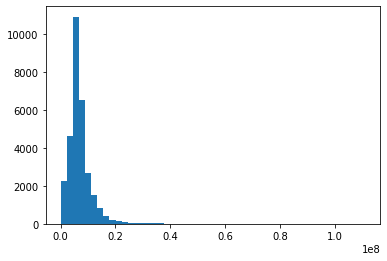

In [37]:
plt.hist(df.price_doc, bins=50)

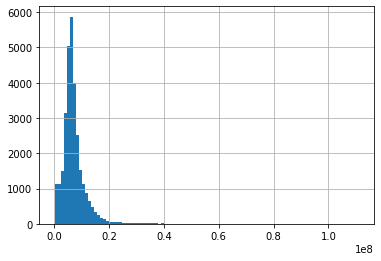

In [38]:
df.price_doc.hist(bins=100)

**20. From the plot in 16, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.**

In [39]:
df['log_price'] = np.log(df.price_doc.values)

In [40]:
df[:5][['price_doc', 'log_price']]

,price_doc,log_price
0,5850000,15.581952
1,6000000,15.607270
2,5700000,15.555977
3,13100000,16.388123
4,16331452,16.608603


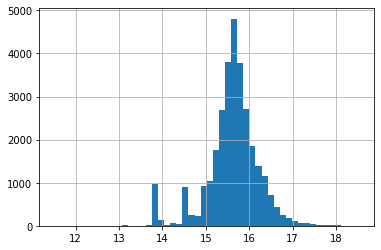

In [41]:
plt.hist(df.log_price, bins=50)
plt.grid()

**21. Drop the log_price column.**

In [42]:
df.drop(columns='log_price',axis=1,inplace=True)

**22 Save the dataframe we have now to housing_data_new.csv file**

In [44]:
# df.to_csv('housing_data_new.csv')